In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
import warnings
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

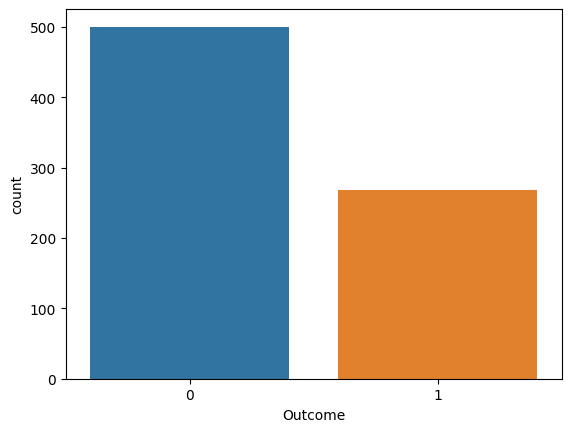

In [8]:
sns.countplot(data = df , x =df['Outcome'])
plt.show()

In [9]:
negative_data = df[df['Outcome']==0]
positive_data = df[df['Outcome']==1]


In [13]:
positive_upsample = resample(positive_data,
                             replace=True,
                             n_samples=int(0.9*len(negative_data)),
                             random_state=42)

In [14]:
new_df = negative_data
new_df = new_df.append(positive_upsample)

In [15]:
new_df.shape

(950, 9)

<Axes: xlabel='Outcome', ylabel='count'>

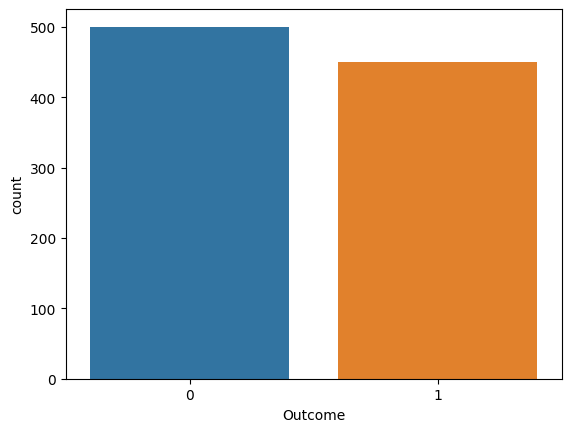

In [17]:
sns.countplot(data =new_df , x = new_df['Outcome'])

In [18]:
x_new = df.drop("Outcome",axis =1)
y_new = df[["Outcome"]]

In [19]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x_new)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y_new, test_size=0.2)

In [28]:
k_values = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51]
accuracy_values = []

In [29]:
for i in range(len(k_values)):
    model = KNeighborsClassifier(n_neighbors=k_values[i])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)

In [30]:
px.line(x=k_values,y=accuracy_values)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
                          37, 39, 41, 43, 45, 47, 49, 51], dtype=int64),
              'xaxis': 'x',
              'y': array([0.68831169, 0.73376623, 0.74025974, 0.68831169, 0.75974026, 0.75974026,
                          0.76623377, 0.75974026, 0.75324675, 0.77272727, 0.74025974, 0.73376623,
                          0.74025974, 0.74025974, 0.74675325, 0.75324675, 0.74025974, 0.72077922,
                          0.72727273, 0.72077922, 0.72077922, 0.72727273, 0.72077922, 0.71428571,
                          0.7012987 , 0.7012987 ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [31]:
optimal_accuracy = -1
optimal_k = -1
for i in list(zip(k_values , accuracy_values)):
    if i[1] > optimal_accuracy:
        optimal_k = i[0]
        optimal_accuracy = i[1]

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

In [33]:
knn_model.fit(x_train ,y_train)

KNeighborsClassifier(n_neighbors=19)

In [34]:
y_pred = knn_model.predict(x_test)

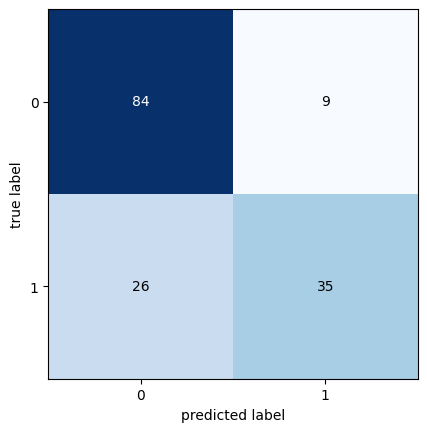

In [37]:
from mlxtend.plotting import plot_confusion_matrix
cm =  metrics.confusion_matrix(y_test , y_pred)
plot_confusion_matrix(cm)
plt.show()

In [38]:
false_positive_rate , true_positive_rate , threshold= metrics.roc_curve(y_test,y_pred)

In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        93
           1       0.80      0.57      0.67        61

    accuracy                           0.77       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.77      0.76       154



In [39]:
print(metrics.roc_auc_score(y_test , y_pred))

0.7384981491274457


In [42]:
# plt.subplots(1, figsize=(10,7))
# plt.title('Receiver Operating Characteristic - KNN')
# plt.plot(false_positive_rate, true_positive_rate)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()